## Setting Up

In [ ]:
from IPython.display import clear_output

for i in range(100):
    clear_output()

In [ ]:
import pyodbc
import sqlalchemy as sqla

In [ ]:
# Connect via Windows authentication:
# conn_specs = ('DRIVER={ODBC Driver 17 for SQL Server};'
#                                     + 'SERVER=scotty-test;'
#                                     + 'DATABASE=Interject_Reporting;'
#                                    + 'trusted_connection=yes;')
# conn_str = 'mssql+pyodbc:///?odbc_connect={}'.format(conn_specs)
# engine = sqla.create_engine(conn_str)

# Define a function that we can use to connect to a db on the fly:
def pyodbc_connect_scotty_test(db_name):
    try:
        connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                                        + 'SERVER=scotty-test;'
                                        + 'DATABASE=' + db_name + ';'
                                       + 'trusted_connection=yes;')
        return connection
    except:
        return 1 # could not connect

In [ ]:
# Find out how many cursors we can have running concurrently:
connection.getinfo(pyodbc.SQL_MAX_CONCURRENT_ACTIVITIES)

In [ ]:
import pandas as pd

In [ ]:
# Connect to [Interject_Reporting]:
# intj_reporting_df = pd.read_sql('[DataCells].[Request]', engine)

reporting_conn = pyodbc_connect_scotty_test('Interject_Reporting')

In [ ]:
# Create a cursor to run straight SQL queries:
reporting_cursor = reporting_conn.cursor()

In [ ]:
# Load [DataCells].[Request] and [DataCells].[Request_History] into DataFrames:
request = 'SELECT * FROM [DataCells].[Request]'
request_history = 'SELECT * FROM [DataCells].[Request_History]'
request_df = pd.read_sql(request, reporting_conn) # So we don't need SQLalchemy...
request_history_df = pd.read_sql(request_history, reporting_conn) # So we don't need SQLalchemy...

### Visualizing DurationSeconds

In [ ]:
# View data based on DurationSeconds, find mins and maxes:



In [ ]:
import numpy as np, matplotlib.pyplot as plt

In [ ]:
request_df['DurationSeconds'].describe()

In [ ]:
# Histogram of DurationSeconds:
request_df.hist(column='DurationSeconds')

### StartTimeStamp and EndTimeStamp

Create a pd series that is ( StartTimeStamp - EndTimeStamp ). Doing this to resolve the negative DurationSeconds values reported above...

In [ ]:
start_end_diff_sql = 'SELECT datediff(second, [StartTimeStamp], [EndTimeStamp]) as StartEndDiffSeconds FROM [DataCells].[Request]'

In [ ]:
# Do it with a cursor:
reporting_cursor.execute(start_end_diff_sql)
request_durations = pd.Series(reporting_cursor.fetchall())

In [22]:
# Same thing but with read_sql() instead of cursor:
request_durations = pd.read_sql(start_end_diff_sql, reporting_conn)

In [31]:
request_durations.count()

StartEndDiffSeconds    281
dtype: int64

In [32]:
request_durations.isna().sum()

StartEndDiffSeconds    60
dtype: int64

#### Describe as DF

In [23]:
request_durations.describe()

,StartEndDiffSeconds
count,281.000000
mean,7.825623
std,60.532059
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,984.000000


In [51]:
request_durations.shape

(341, 1)

In [48]:
request_durations.T.shape

(1, 341)

In [58]:
# 1D-ify it (should become a series):
request_durations_series = request_durations.squeeze()
print(request_durations_series.shape)

type(request_durations_series) is pd.Series

# Didn't work...
# request_durations_arr = request_durations.values
# request_durations_arr.shape
# request_durations_series = pd.Series(request_durations_arr)

(341,)


True

In [66]:
request_durations_series.describe()

count    281.000000
mean       7.825623
std       60.532059
min        0.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      984.000000
Name: StartEndDiffSeconds, dtype: float64

In [70]:
# Save unique values:
unique_times = request_durations_series.unique()
unique_times

array([  0.,  12.,  13.,   9.,   8.,   1.,   5.,  11.,  31.,  27., 187.,
       180.,  nan,  24., 984.,  20.,   2.,   3.,   4.,   7.,   6.])

In [72]:
time_freq = request_durations_series.value_counts(dropna=False)
time_freq

1.0      95
NaN      60
0.0      54
3.0      29
2.0      22
5.0      19
4.0      15
9.0      15
6.0       7
8.0       5
7.0       4
12.0      4
11.0      2
24.0      2
13.0      2
180.0     1
27.0      1
31.0      1
984.0     1
20.0      1
187.0     1
Name: StartEndDiffSeconds, dtype: int64

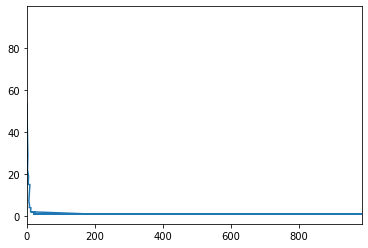

In [73]:
time_freq.plot()

In [ ]:
fig, ax = plt.subplot()

In [ ]:
request_df.head()

In [ ]:
request_history_df.head()